<img src="images/cs5228-header-title.png" />

# Assignment 2 - Clustering & Association Rule Mining

Hello everyone, this assignment notebook covers Clustering (again) and Association Rule Mining (ARM). There are some code-completion tasks and question-answering tasks in this answer sheet. For code completion tasks, please write down your answer (i.e., your lines of code) between sentences "Your code starts here" and "Your code ends here". The space between these two lines does not reflect the required or expected lines of code. For answers in plain text, you can refer to [this Markdown guide](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd) to customize the layout (although it shouldn't be needed).

When you work on this notebook, you can insert additional code cells (e.g., for testing) or markdown cells (e.g., to keep track of your thoughts). However, before the submission, please remove all those additional cells again. Thanks!

**Important:** 
* Remember to rename and save this Jupyter notebook as **A2_YourName_YourNUSNETID.ipynb** (e.g., **A2_BobSmith_e12345678.ipynb**) before submission!
* Remember to rename and save the Python script file **A2_YourName_YourNUSNETID.py** (e.g., **A2_BobSmith_e12345678.py**) before submission!
* Submission deadline is **Oct 3, 11.59 pm**. Late submissions will be penalized by 10% for each additional day. Failure to appropriately rename both files will yield a penalty of 1 Point. There is no need to use your full name if it's rather long; it's just important to easily identify you in Canvas etc.

Please also add your NUSNET and student id in the code cell below. This is just to make any identification of your notebook doubly sure.

In [2]:
import pandas as pd
url = "https://nextcloud.wu.engineer/index.php/s/md5dL6XXjjBYBRG/download/endomondo_proper_cleaned_expanded.csv"
storage_options = {'User-Agent': 'Mozilla/5.0'}
endomondo_df = pd.read_csv(url, storage_options=storage_options)

In [1]:
student_id = 'A0255954R'
nusnet_id = 'e0962966'

Here is an overview over the tasks to be solved and the points associated with each task. The notebook can appear very long and verbose, but note that a lot of parts provide additional explanations, documentation, or some discussion. The code and markdown cells you are supposed to complete are well-indicated, but you can use the overview below to double-check that you covered everything.

* **1 DBSCAN & Comparing Cluster Algorithms (30 Points)**
    * 1.1 Implementing DBSCAN for Noise Detection (10 Points)
        * 1.1 a) Compute Core Points (5 Points)
        * 1.2 b) Compute Noise Points (5 Points)
    * 1.2 Questions about Clustering Algorithms (20 Points)
        * 1.2 a) Interpreting Dendrograms for Hierarchical Clusterings (6 Points)
        * 1.2 b) Comparing the Results of Different Clustering Algorithms (6 Points)
        * 1.2 c) Short Essay Questions (8 Points)
* **2 Association Rule Mining (ARM) (20 Points)**
    * 2.1 Implementing Apriori Algorithm (10 Points)
        * 2.1 a) Create Candidate Itemsets $L_k$ (6 Points)
        * 2.1 b) Generate Frequent Itemsets with Apriori Algorithm (4 Points)
    * 2.2 Recommending Movies using ARM (10 Points)
        * 2.2 a) Compare the Runs A-D and Discuss your Observations! (3 Points) 
        * 2.2 b) Compare the Runs A-D and Discuss the Results for Building a Recommendation Engine! (3 Points)
        * 2.2 c) Sketch a Movie Recommendation Algorithm Based on ARM (4 Points)

## Setting up the Notebook

In [2]:
# Some magic so that the notebook will reload the external python script file any time you edit and save the .py file;
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from sklearn.cluster import DBSCAN

from efficient_apriori import apriori   # https://pypi.org/project/efficient-apriori/

from src.utils import *

np.set_printoptions(precision=2)

**Important:** This notebook also requires you to complete in a separate `.py` script file. This keeps this notebook cleaner and simplifies testing your implementations for us. As you need to rename the file `A2_YourName_YourNUSNETID.py`, you also need to edit the import statement below accordingly.

In [4]:
from A2_WuTong_e0962966 import get_noise_dbscan
#from A2_BobSmith_e12345678 import get_noise_dbscan # <-- you well need to rename this accordingly

-------------------

## 1 DBSCAN & Comparing Cluster Algorithms (30 Points)


### 1.1 Implementing DBSCAN for Noise Detection (10 Points)

In the lecture, we covered the original algorithm of DBSCAN, which you can also find on [Wikipedia](https://en.wikipedia.org/wiki/DBSCAN). While not difficult to implement, it takes quite a couple of lines of codes to do so. For this assignment, however, we are only interested in the points of a dataset that DBSCAN considers noise (as illustrated below; the red dots in the next plot). This includes that we do not have to care about

* how many clusters there are (the plot below hints at 3 clusters but it does not matter) *and*
* which non-noise points (the grey dots in the plot below) belong to which cluster

**Your task is to implement a modified/simplified version of DBSCAN to find all noise points in a dataset!** The skeleton of method `get_noise_dbscan()` you need to complete is found in the file `A2.py` (before the appropriate renaming). The method takes data matrix `X` as well as the two basic parameters `eps` and `min_samples` as input parameters; we use the same naming as scikit-learn's implementation of [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html).  The output should be 2 lists of indices: (a) one containing the indices of all *core points* and (b) one containing the indices of all *noise points* in input dataset X.

**Important:**
* We only split this task into 1.1 a) and 1.1 b) to have intermediate results you can check for correctness (and potentially to better allow for partial marking). Our reference solutions first finds all core points and uses this information to find all noise points; hence the 2 separate code blocks for you to complete.
* However, if you have a better/faster/shorter/cooler/etc. solution, you are more than welcome to implement it and ignore the intermediate result of finding all core points. Only the result from 1.1 b) is important. This also means that you can ignore 1.1 a) and still get full marks if you correctly identify all noise points.
* If you have an alternative solution, please make sure that the method still returns the 2 output parameters `(core_point_indices, noise_point_indices)`. If you do not need to explicitly identify the core points, you can simply return `None` for `core_point_indices`.
* You can import any method `numpy`, `scipy`, `sklearn`, or `pandas` has to offer -- except for any ready-made implementation of DBSCAN, of course :). Please add any imports to the code cell at the top with the other imports. Hint: We already imported [`sklearn.metrics.pairwise.euclidean_distances`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html) for you.

We will benchmark your implementation as part of our Little Competitions to see whose solution is the fastest.

#### Dataset Preparation (nothing for you to do here)

In [5]:
X_dbscan_toy = pd.read_csv('data/a2-dbscan-toy-dataset.txt', header=None, sep=' ').to_numpy()

print('The shape of X_dbscan_toy is {}'.format(X_dbscan_toy.shape))

The shape of X_dbscan_toy is (70, 2)


Now we can run scikit-learn's implementation of [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) on this dataset. Here we use `eps=0.1` and `min_samples=10` as values for the two main input parameters for DBSCAN that specify the minimum "density" of clusters.

In [6]:
dbscan_clustering = DBSCAN(eps=0.1, min_samples=10).fit(X_dbscan_toy)

The points that are noise points are labeled with `-1`, while all points belonging to clusters are labeled with `0`, `1`, `2`, etc. So we can easily find the indices of all the points labeled as noise as follows:

In [7]:
cluster_point_indices = np.argwhere(dbscan_clustering.labels_ >= 0).squeeze()
noise_point_indices = np.argwhere(dbscan_clustering.labels_ < 0).squeeze()

print('The indices of the points labeled as noise are: {}'.format(noise_point_indices))

The indices of the points labeled as noise are: [ 0  4 27 31 33 39 43 46 51 65]


Of course, we can also plot the results. Note that the figure below only highlights the points labeled as noise as red triangles; all points belonging to *some* clusters are in grey points (note that we do not care to which exact cluster these points belong).

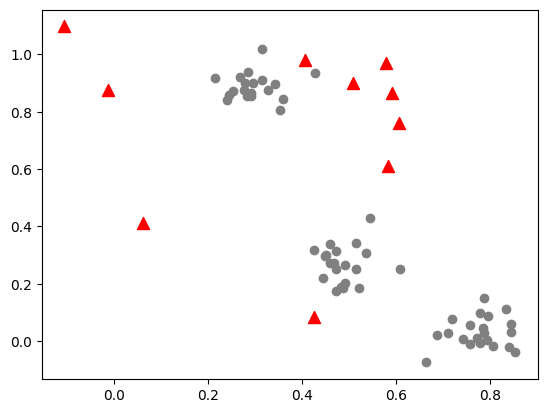

In [8]:
plt.figure()
plt.scatter(X_dbscan_toy[cluster_point_indices,0], X_dbscan_toy[cluster_point_indices,1], c='grey')
plt.scatter(X_dbscan_toy[noise_point_indices,0], X_dbscan_toy[noise_point_indices,1], c='red', marker='^', s=75)
plt.show()

Summing up, the red dots in the plots we define as noise or outliers as they are very dissimilar to the other data points. In practice, we would likely remove those noise points, treat them separately, or maybe perform additional preprocessing steps to potentially "denoise" the dataset. However, the steps of choice generally depend heavily on the exact data mining task. Here, we focus on the identification of noise points.

#### 1.1 a) Compute Core Points (5 Points)

As mentioned above, our reference solution first computes all core points. If you follow this approach, complete the respective part in the code of method `get_noise_dbscan()`. Some hints:
* Recall that we do not care to which cluster a core point belongs to, only that it is a core point in *some* cluster
* Have a look at method [`sklearn.metrics.pairwise.euclidean_distances`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html); it might make your life easier.

In [9]:
my_core_point_indices, _ = get_noise_dbscan(X_dbscan_toy, eps=0.1, min_samples=10)

print('Total number of core points: {}\n'.format(len(my_core_point_indices)))
print('The first 25 indices of the points labeled as core points:\n{}'.format(sorted(my_core_point_indices)[:20]))

Total number of core points: 50

The first 25 indices of the points labeled as core points:
[1, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24]


The output of previous code cell should look like:
    
```
Total number of core points: 50

The first 25 indices of the points labeled as core points:
[1, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24]
```

Note that `0`, `4`, and `27` are missing from this list since [`sklearn.cluster.DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) told us that these points are noise. Of course, also the border points are missing here, but [`sklearn.cluster.DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) does not return those explicitly.

#### 1.1 b) Compute Noise Points (5 Points)

Knowing the core points is useful but only an intermediate step. Now it is time to complete the method `get_noise_dbscan()` to compute the indices of all noise points in `X`. Again, our reference solution uses `core_point_indices` to accomplish this. If your implementation does not require the information about core points but returns the correct `noise_point_indices` then this is perfectly fine!

In [10]:
_, my_noise_point_indices = get_noise_dbscan(X_dbscan_toy, eps=0.1, min_samples=10)

print('Total number of noise points: {}\n'.format(len(my_noise_point_indices)))
print('The indices of all points labeled as noise points:\n{}'.format(sorted(my_noise_point_indices)))

Total number of noise points: 10

The indices of all points labeled as noise points:
[0, 4, 27, 31, 33, 39, 43, 46, 51, 65]


The output of previous code cell should look like:

```
Total number of noise points: 10

The indices of all points labeled as noise points:
[0, 4, 27, 31, 33, 39, 43, 46, 51, 65]
```

Since we used the same values for `eps` and `min_samples`, this result matches the output we saw earlier when we used scikit-learn's implementation of [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) over the toy dataset.

### 1.2 Questions about Clustering Algorithms (20 Points)

#### 1.2 a) Interpreting Dendrograms for Hierarchical Clusterings (6 Points)

We saw in the lecture that dendrograms are a meaningful way to visualize the hierarchical relationships between the data points with respect to the clustering using AGNES (or any other hierarchical clustering technique). Properly interpreting them is important to get a correct understanding of the underlying data.

Below are the plots of 6 different datasets labeled A-F. Each dataset contains 30 data points, each with two dimensions.

<img src="images/a2-agnes-data-labeled.png">

Below are 6 dendrograms labeled 1-6. These dendograms show the clustering using AGNES with Single Linkage for the 6 datasets above, but in a random order.

<img src="images/a2-agnes-dendrogram-labeled.png">

Find the correct combinations of datasets and dendrograms -- that is, find for each dataset the dendrogram that visualizes the clustering using AGNES with Single Linkage! Give brief explanation for each decision! Complete the table below! (The last line shows an example.)

**Your Answer:**

| Dataset | Dendrogram                     | Brief Explanation                                                                                                                                                                                                                                                                         |
| ---  |--------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **A**    | 6                              | This Dendrogram show there are two clusters formed at the same time and they have the similar node number as the merging goes. Then finally they merged into one cluster while the distance between two cluster is significantlly higher than others. This dendrogram fits the dataset A. |
| **B**    | 5                              | For dendrogram 5, it has one node which has significant distance between others, and others have short distance but still can be merged to multiple cluster, which fit the dataset B                                                                                                      |
| **C**    | 2                              | Dataset C shows there are 2 significant distanced node, and these 2 node must be merged from only 1 cluster but not multiple, so dendrogram 2 is fit for this pattern.                                                                                                                    |
| **D**    | 4                              | Dataset D can show 3 cluster very clearly, then these 3 clusters merged to 1 big cluster but have larger distance. Which fit dendrogram 4.                                                                                                                                                |
| **E**    | 1                              | Dataset E shows chaos and in the initial phase there could be lot of small clusters, and the final big cluster formation is not dramatic -- there is no ndoe leaves far away from others.                                                                                                 |
| **F**    | 3                              | In the bottom of the dendrogram, there are many nodes merge to cluster, with the most nodes merged, the rest node's distance becomes larger and larger. This shows an 'expotenial increasing' which fit the dataset F.                                                                    |
| **<font color='red'>X</font>**    | **<font color='red'>9</font>** | <font color='red'>The dataset plot looks like a face and the dendrogram looks like a hat (please come up with better explanations :) !)</font>                                                                                                                                            |

#### 1.2 b) Comparing the Results of Different Clustering Algorithms (6 Points)

The figure belows shows the 6 different clusterings A-F, each computed over a dataset of 8 unique data points $x_1 x_2, ..., x_8$. The datasets are independent from each other for the 6 clusterings. Each clustering contains 3 clusters are represented by the table. A `1` in the result table indicates that the corresponding data point is part of the corresponding cluster. For example, in Clustering A, the `1` in the bottom-left cell indicates that data point $x_8$ is part of Cluster $C_1$.

**Addtional constraints:**

* For K-Means and DBSCAN, the 3 cluster $C_1$, $C_2$, and $C_3$ are the **only** clusters; for AGNES you can assume there might be **more** clusters in the hierarchy
* For DBSCAN, the input parameter for the minimum number of neighboring points is  $MinPts \geq 2$

<img src="images/a2-clustering-comparison.png">

**For each clustering, decide which algorithm (K-Means, DBSCAN, AGNES) can have produced the clustering!** Use the table below for the answer. If an algorithm could have produced a clustering, just write *OK* in the respective cell of the table. If an algorithm could not have produced a clustering, enter a brief explanation into the respective table cell.

**Your Answer:**

|  | K-Means                                                        | DBSCAN                                                        | AGNES |
|-----|----------------------------------------------------------------|---------------------------------------------------------------|-------|
| **Clustering A**  | OK                                                             | OK                                                            | OK    |
| **Clustering B**  | K-Means not allow mutiple cluster for one point                | DBSCAN not allow mutiple cluster for one point                | OK    |
| **Clustering C**  | K-Means not allow no cluster or multiple cluster for one point | DBSCAN not allow multiple cluster for one point               | OK    |
| **Clustering D**  | K-Means not allow no cluster for one point                     | OK                                                            | OK    |
| **Clustering E**  | OK                                                             | Cluster 2 only has 1 point which below the min points setting | OK    |
| **Clustering F**  | K-Means not allow mutiple cluster for one point                                                             | DBSCAN not allow mutiple cluster for one point                                                           | OK     |

#### 1.2 c) Short Essay Questions (8 Points)

Recall the K-Means results in clusterings that are complete, i.e., each data point is assigned to a cluster. In contrast, DBSCAN has the notion of noise, i.e., points that are not part of any cluster, which can be used to identify outliers (see also Task 1.1). Now let's assume we want to identify outliers in a dataset but only have a standard implementation for K-Means available.

**How can we utilize K-Means to (potentially) identify outliers? (2 Points)** Since the notion of outliers is not well defined, its not about having a fool-proof solution but to make a well-informed decision to limit the set of data points that are potential outliers.

**Your Answer:**

To identify outliers using K-Means, we can calculate the Euclidean distance between each data point and its assigned cluster centroid. Points that are significantly farther from their centroids than the majority can be considered potential outliers. A threshold can be set based on the mean or standard deviation of these distances, and points that exceed this threshold can be flagged as outliers. This approach works on the assumption that outliers tend to have a larger distance from the cluster center compared to most other points.

We saw in the lecture that K-Means can return empty clusters.

**In which situation may K-Means return at least 1 empty cluster? (2 Points)** To address this task, please make the following assumptions:
* The number of data points $N$ in the dataset is $N > 0$
* The number of clusters $K$ when running K-Means is $K \geq 2$
* The initialization of the initial centroids can be arbitrarily good or bad

**Your Answer:**

K-Means can return at least one empty cluster when, after an iteration, none of the data points are closest to a particular cluster centroid. This situation may arise if the initial centroids are poorly chosen or if the dataset is not evenly distributed. For example, if some centroids are initialized far from any dense group of data points, or if the centroids get updated to locations where no data points are nearby, no points will be assigned to those centroids, resulting in an empty cluster.

Assume your dataset contains the geolocations of traffic accidents on Singapore expressways over the time span of a year. Using AGNES, you want to find sections of the expressways where traffic accidents are particularly common.

**Which Linkage Methods covered in the lecture is most suitable for this task? (2 Points)** Briefly explain your choice!

**Your Answer:**

The Complete Linkage method is the most suitable for this task. Complete linkage considers the maximum distance between points in different clusters, which helps to form compact and evenly distributed clusters. For traffic accident data, it is essential to identify sections of expressways where accidents are particularly common. Using complete linkage, we can identify clusters of accidents that are close to each other in space and time, which can help to identify high-risk areas on the expressways.

Assume you have a dataset `X`, run DBSCAN, and get a clustering that contains a set of clusters and some noise points (there's no need to be more precise; it's only important that you don't get just noise). Let's also assume you create a new dataset `X_new` simply by shuffling `X` (i.e., randomly change the order of data points in the dataset); no other changes. Now you run DBSCAN with the *same* parameters as before over `X_new` and get a different clustering, i.e., most of the clusters are not exactly the same as before.

**What does this information tell about the dataset and clustering? (2 Points)** This may include a brief discussion how changing the parameters of DBSCAN will likely affect the results.

**Your Answer:**

The fact that shuffling the dataset X and running DBSCAN with the same parameters yields a different clustering suggests that the dataset may contain borderline points or areas of low density where the clustering is sensitive to small changes. This indicates that the clustering is unstable and that the dataset likely has regions where points are close to the decision boundary between being classified as part of a cluster or as noise.

DBSCAN's results depend on the density of points in the neighborhood, and in datasets with borderline density regions, the inclusion or exclusion of points in clusters can vary. When parameters like eps (neighborhood radius) or min_samples (minimum number of points to form a core point) are near a critical threshold, small changes in point order can affect the clustering.

To improve stability, increasing eps or decreasing min_samples might help by making the algorithm less sensitive to points near the boundary between clusters and noise. However, adjusting parameters can also cause over-clustering (merging separate clusters) or under-clustering (classifying too many points as noise).

---

## 2 Association Rule Mining (ARM)

Your task is to implement the Apriori Algorithm for finding Association Rules. In more detail, we focus on the **Apriori Algorithm for finding Frequent Itemsets** -- once we have the Frequent Itemsets, we use a naive approach for the association rule. We will provide a small method for that part later.


### 2.1 Implementing Apriori Algorithm

#### Toy Dataset

The following dataset with 5 transactions and 6 different items is directly taken from the lecture slides. This should make it easier to test your implementation. The format is a list of tuples, where each tuple represents the set of items of an individual transaction. This format can also be used as input for the `efficient-apriori` package.

In [15]:
transactions_demo = [
    ('bread', 'yogurt'),
    ('bread', 'milk', 'cereal', 'eggs'),
    ('yogurt', 'milk', 'cereal', 'cheese'),
    ('bread', 'yogurt', 'milk', 'cereal'),
    ('bread', 'yogurt', 'milk', 'cheese')
]

#### Auxiliary Methods

We want you to focus on the Apriori algorithm. So we provide a set of auxiliary functions. Feel free to look at their implementation in the file `src/utils.py`.

The method `unique_items()` returns all the unique items across all transactions.

In [16]:
unique_items(transactions_demo)

{'bread', 'cereal', 'cheese', 'eggs', 'milk', 'yogurt'}

The method `support()` calculates and returns the support for a given itemset and set of transactions.

In [17]:
support(transactions_demo, ('bread', 'milk'))

0.6

The method `confidence()` calculates and returns the confidence for a given association rule and set of transactions. An association rule is represented by a 2-tuple, where the first element represents itemset X and the second element represents items Y (i.e., $X \Rightarrow Y$)

In [18]:
confidence(transactions_demo, (('bread',), ('milk',)))

0.75

The method `merge_itemsets()` merges two given itemsets into one itemset.

In [19]:
merge_itemsets(('bread', 'milk'), ('bread', 'eggs'))

('bread', 'eggs', 'milk')

For your implementation, you can make use of these auxiliary methods wherever you see fit. And that is, of course, strongly recommended, as it makes the programming task much easier. So, let's get started.

#### 2.1 a) Create Candidate Itemsets $L_k$ (6 Points)

Let's assume we have found $F_{k-1}$, i.e., all Frequent Itemsets for size $k-1$. For example $F_1$ is the set of all Frequent Itemsets of size 1, which is simply the set of unique items across all transactions with sufficient support. The next step is now to find $L_k$, all Candidate Itemsets of size $k$. In the lecture, we introduced two methods for this. For this assignment, we focus on the $\mathbf{F_{k-1} \times F_{k-1}}$ method -- that is, we use the Frequent Itemsets from the last step to calculate the Candidate Itemsets for the current step.

Recall from the lecture that creating $L_k$ involves two main parts:

* **Generating** all possible $k$-itemsets from the Frequent Itemsets $F_{k-1}$; and

* **Pruning** all $k$-itemsets that cannot be frequent based on the information we already have ($L_k$ should only contain the itemsets for which we indeed calculate the support for)


Recall that we also can (and should) **prune** any Candidate Itemsets than cannot possibly also be Frequent Itemsets  based on the information we already have. In other words, the Candidate Itemsets of size $k$ should only contain the itemsets for which we indeed calculate the support for.

**Hint:** In the lecture, to make it more illustrative, we first generate all possible Candidate Itemsets and then prune the ones that cannot possibly be frequent. In practice, to save memory space, it's better to check each Candidate Itemset immediately before even adding it to $L_k$. The skeleton code below reflects this. However, if you indeed want to implement pruning as its own step, you're free to do so.

**Implement method `generate_Lk()` to calculate the Candidate Itemsets $L_k$ given the Frequent Itemsets $F_{k-1}$!** Note that we walked in detail through an example of this process in the lecture. Below is a code cell that reflects this example to test your implementation.

In [20]:
def generate_Lk(Fk_minus_one):

    # The code just looks a bit odd since we cannot get an element from a set using indexing
    k = len(next(iter(Fk_minus_one))) + 1

    # Initialize as set as a fail safe to avoid any duplicates
    Lk = set()
    
    for itemset1 in Fk_minus_one:
        for itemset2 in Fk_minus_one:
            
            ######################################################################
            ### Your code starts here ############################################
            
            # Merge the two itemsets
            candidate_itemset = merge_itemsets(itemset1, itemset2)
            if len(candidate_itemset) == k:
                Lk.add(candidate_itemset)

            
            ### Your code ends here ##############################################
            ######################################################################
            
            pass # Just there so the empty loop does not throw an error
    
    ######################################################################
    ### Your code starts here ############################################
    
    # MAY ONLY BE REQUIRED IF YOU TREAT PRUNING AS A SEPARATE STEP!!!
    # which you shouldn't for performance reasons in practice, but for the assignment its fine
    
    ### Your code ends here ##############################################
    ######################################################################
    
    return Lk

In [21]:
k_itemsets = generate_Lk({
    ('bread', 'cereal'), ('bread', 'milk'), ('bread', 'yogurt'), ('cereal', 'milk'),
    ('cereal', 'yogurt'), ('cheese', 'milk'), ('cheese', 'yogurt'), ('milk', 'yogurt')
})

for itemset in k_itemsets:
    print(itemset)

('bread', 'cereal', 'yogurt')
('cereal', 'cheese', 'milk')
('cheese', 'milk', 'yogurt')
('cereal', 'milk', 'yogurt')
('bread', 'cheese', 'yogurt')
('bread', 'cereal', 'milk')
('bread', 'milk', 'yogurt')
('cereal', 'cheese', 'yogurt')
('bread', 'cheese', 'milk')


#### 2.1 b) Generate Frequent Itemsets with Apriori Algorithm (4 Points)

The method `generate_Lk()` covered the "Generate" and "Prune" steps of the Apriori Algorithm for finding Frequent Itemsets. Now only the "Calculate" and "Filter" step is missing. However, with `generate_Lk()` in place and together with the auxiliary methods we provide (see above), putting the Apriori Algorithm together should be pretty straightforward.

**Implement `frequent_itemsets_apriori()` to find all Frequent Itemset given a set of transactions and a minimum support of `min_support`!** Again, below is a code cell that reflects this example to test your implementation.

In [22]:
def frequent_itemsets_apriori(transactions, min_support):
    
    # The frequent 1-itemsets are all unique items across all transactions with sufficient support
    # The one-liner below simply loops over all uniques items and checks the condition w.r.t. the support
    F1 = set([(s,) for s in unique_items(transactions) if support(transactions, (s,)) >= min_support ])
    
    # If there is not even a single 1-itemset that is frequent, we can just stop here
    if len(F1) == 0:
        return {}
    
    # Initialize dictionary with all current frequent itemsets for each size k
    # Example: { 1: {(a), (b), (c)}, 2: {(a, c), ...} }
    F = { 1: F1 }
    
    # Find now all frequent itemsets of size 2, 3, 4, ... (sys.maxsize basically mean infinity here)
    for k in range(2, sys.maxsize):

        Fk = set()
        
        ########################################################################################
        ### Your code starts here ##############################################################

        # Generate the Candidate Itemsets Lk
        Lk = generate_Lk(F[k-1])
        Fk = set([ itemset for itemset in Lk if support(transactions, itemset) >= min_support ])
        if len(Fk) == 0:
            break
        
        ### Your code ends here ################################################################
        ########################################################################################
                
        F[k] = Fk    

    # Merge the dictionary of itemsets to a single set and return it
    # Example: {1: {(a), (b), (c)}, 2: (a, c)} => {(a), (b), (c), (a, c)}
    return set.union(*[ itemsets for k, itemsets in F.items() ])

In [23]:
frequent_itemsets = frequent_itemsets_apriori(transactions_demo, 0.6)
for itemset in frequent_itemsets:
    print(itemset)

('cereal', 'milk')
('cereal',)
('yogurt',)
('bread', 'yogurt')
('milk',)
('milk', 'yogurt')
('bread',)
('bread', 'milk')


#### From Frequent Itemsets to Association Rules (nothing for you to do here!)

Your implementation so far gives you the Frequent Itemsets in a list of transactions using the Apriori method. This step is typically the most time-consuming one in Association Rule Mining. However, we still have to do the second step and find all Association Rules given the Frequent Itemsets. We saw in the lecture that this can also be done in an efficient manner using the Apriori method to avoid checking all rules.

Since this step is typically less computationally expensive, we simply do it the naive way -- that is, we go over all Frequent Itemsets, and check for each Frequent Itemset and which of the Association Rules that can be generated from it has a sufficiently high confidence. With all the auxiliary methods we provide, this becomes trivial to implement, so we simply give you the method `find_association_rules()` below. Note how it uses your implementation of `frequent_itemsets_apriori()`.

In [24]:
def find_association_rules(transactions, min_support, min_confidence):
    # Initialize empty list of association rules
    association_rules = []
    
    # Find and loop over all frequent itemsets
    for itemset in frequent_itemsets_apriori(transactions, min_support):
        if len(itemset) == 1:
            continue

        # Find and loop over all association rules that can be generated from the itemset
        for r in generate_association_rules(itemset):
            # Check if the association rule fulfils the confidence requriement
            if confidence(transactions, r) >= min_confidence:
                association_rules.append(r)
                
    # Return final list of association rules
    return association_rules

In [25]:
for rule in find_association_rules(transactions_demo, 0.4, 1.0):
    print(rule)

(('cheese',), ('yogurt',))
(('cereal',), ('milk',))
(('cheese',), ('milk',))
(('cheese',), ('milk', 'yogurt'))
(('cheese', 'milk'), ('yogurt',))
(('cheese', 'yogurt'), ('milk',))
(('cereal', 'yogurt'), ('milk',))
(('bread', 'cereal'), ('milk',))


#### Comparison with `efficient-apriori` package  (nothing for you to do here!)

You can run the apriori algorithm over the demo data to check if your implementation is correct. Try different values for the parameters `min_support` and `min_confidence` and compare the results. Note that the order of the returned association rules might differ between your implementation and the apriori one.

In [26]:
_, rules = apriori(transactions_demo, min_support=0.4, min_confidence=1.0)

for r in rules:
    print('Rule [{} => {}] (support: {}, confidence: {}, lift: {})'.format(r.lhs, r.rhs, r.support, r.confidence, r.lift))


Rule [('cereal',) => ('milk',)] (support: 0.6, confidence: 1.0, lift: 1.25)
Rule [('cheese',) => ('milk',)] (support: 0.4, confidence: 1.0, lift: 1.25)
Rule [('cheese',) => ('yogurt',)] (support: 0.4, confidence: 1.0, lift: 1.25)
Rule [('bread', 'cereal') => ('milk',)] (support: 0.4, confidence: 1.0, lift: 1.25)
Rule [('cereal', 'yogurt') => ('milk',)] (support: 0.4, confidence: 1.0, lift: 1.25)
Rule [('cheese', 'yogurt') => ('milk',)] (support: 0.4, confidence: 1.0, lift: 1.25)
Rule [('cheese', 'milk') => ('yogurt',)] (support: 0.4, confidence: 1.0, lift: 1.25)
Rule [('cheese',) => ('milk', 'yogurt')] (support: 0.4, confidence: 1.0, lift: 1.6666666666666667)


The `efficient-apriori` provides, of course, a much more efficient and convenient implementation (e.g., keeping track of all the metrics for each rule). And this is why we use this package for finding Association Rules in a real-world dataset below. Still, in its core, `efficient-apriori` implements the same underlying Apriori method to Find Frequent Itemsets (but also to find the Association Rules). If you're interested, further below, you can compare the runtimes of `efficient-apriori` and your implementation. Just don't be too disappointed :).

### 2.2 Recommending Movies using ARM

In this task, we look into using Association Rule Mining for recommending movies -- more specifically, recommending movies on physical mediums (Blu-ray, DVD, etc.), assuming that is still a thing nowadays :).

**Dataset.** E-commerce sites do not really make their data publicly available, so we do not have any hard real-world dataset. For the context of this assignment, this is of course no problem. What we use here is a popular movie ratings dataset from [MovieLens](https://grouplens.org/datasets/movielens/). This dataset contains user ratings for movies (1-5 stars, incl. half stars, e.g., 3.5). More specifically, we use the [MovieLens 1M Dataset](https://grouplens.org/datasets/movielens/1m/) containing 1 Million ratings from ~6,000 users on ~4,000 movies and was released February 2003 -- so do not expect any recent Marvel movies :).

While using these ratings allow for more sophisticated recommendation algorithms -- and we will look into some of those in a later lecture -- here we are focusing on Association Rules. This includes that we need to convert this rating dataset into a transaction dataset, where a transaction represents all the movies a user has purchased. We already did this for you making the following assumption: A User has purchased all the movies s/he gave the highest rating. For example, if User A gave a highest rating of 4.5 to any movie, A has purchased all movies A rated with 4.5. This is certainly a simplifying assumption, but perfectly fine for this task here.

Let's have a quick look at the data. First, we load the ids and names of all movies into a dictionary. We need this dictionary since our transactions (i.e., the list of movies a user has bought) contains the ids and not the names of the movies. So to actually see the names of movies in the association rules, we need this way to map from a movie's id to its name.

In [27]:
# Read file with movies (and der ids) into a pandas dataframe
df_movies = pd.read_csv('data/a2-arm-movies.csv', header=None)
# Convert dataframe to dictionary for quick lookups
movie_map = dict(zip(df_movies[0], df_movies[1]))
# Show the first 5 entries as example
for movie_id, movie_name in movie_map.items():
    print('{} -> {}'.format(movie_id, movie_name))
    if movie_id >= 5:
        break

1 -> Toy Story
2 -> Jumanji
3 -> Grumpier Old Men
4 -> Waiting to Exhale
5 -> Father of the Bride Part II


No we can load the transactions. Again, a transaction is a user's shopping history, i.e., all the movies the user has bought. 

In [28]:
shopping_histories = []

# Read shopping histories; each line is a comma-separated list of the movies (i.e., their ids!) a user bought
with open('data/a2-arm-movie-shopping-histories.csv') as file:
    for line in file:
        shopping_histories.append(tuple([ int(i) for i in line.strip().split(',') ]))

# Show the shopping history of the first user for an example; we need movie_map to get the name of each movie
user = 0

print('Shopping history for user {} (used for Aprior algorithm)'.format(user))
print(shopping_histories[user])
print()
print('Detailed shopping history for user {}'.format(user))
for movie_id in shopping_histories[user]:
    print('{}: {}'.format(movie_id, movie_map[movie_id]))

Shopping history for user 0 (used for Aprior algorithm)
(1, 48, 150, 527, 595, 1022, 1028, 1029, 1035, 1193, 1270, 1287, 1836, 1961, 2028, 2355, 2804, 3105)

Detailed shopping history for user 0
1: Toy Story
48: Pocahontas
150: Apollo 13
527: Schindler's List
595: Beauty and the Beast
1022: Cinderella
1028: Mary Poppins
1029: Dumbo
1035: Sound of Music, The
1193: One Flew Over the Cuckoo's Nest
1270: Back to the Future
1287: Ben
1836: Last Days of Disco, The
1961: Rain Man
2028: Saving Private Ryan
2355: Bug's Life, A
2804: Christmas Story, A
3105: Awakenings


With the dataset loaded, we are ready to find interesting Association Rules. For performance reasons, we use the `efficient_apriori` package -- however, further below there is an optional code cell where you can use your own implementation of the Apriori algorithm, in case you are interested.

For added convenience, we provide method `show_top_rules()` which computes the Association Rules using the `efficient-apriori` package, but (a) sorts the rules w.r.t. the specified metric (default: lift), and (b) shows only the top-k rules (default: 5). The method also ensures a consistent output of each Association Rule. Each rule contains the LHS, RHS, as well as the support (s), confidence (c), and lift (l). Feel free to check out the code of method `show_top_rules()` in `src.utils` if anything might be unclear regarding its use.

**Run the following 4 code cells and interpret the results below!** All 4 code cells find Association Rules using the `efficient-apriori` package encapsulated in the auxiliary method `show_top_rules()` for convenience. Appreciate how Runs A-B differ with respect to the input parameter of the method calls! Also, note that we call `show_top_rules()` with `id_map=None` at first, so the results will only display the movie ids. Later, you will be asked to run the cells again with `id_map=movie_map` to see the actual names of the movies.

In [34]:
%%time
# Run A
show_top_rules(shopping_histories, min_support=0.1, min_confidence=0.2, k=10, id_map=None)
show_top_rules(shopping_histories, min_support=0.1, min_confidence=0.2, k=10, id_map=movie_map)

=== Total Number of Rules: 68 ===
(1221) => (858)  [s: 0.13, c: 0.86, l: 3.51]
(858) => (1221)  [s: 0.13, c: 0.55, l: 3.51]
(260; 1210) => (1196)  [s: 0.11, c: 0.84, l: 3.43]
(1196) => (260; 1210)  [s: 0.11, c: 0.44, l: 3.43]
(260; 1196) => (1210)  [s: 0.11, c: 0.58, l: 3.42]
(1210) => (260; 1196)  [s: 0.11, c: 0.63, l: 3.42]
(1210) => (1196)  [s: 0.12, c: 0.73, l: 2.96]
(1196) => (1210)  [s: 0.12, c: 0.51, l: 2.96]
(260; 1198) => (1196)  [s: 0.11, c: 0.71, l: 2.88]
(1196) => (260; 1198)  [s: 0.11, c: 0.46, l: 2.88]
(1196; 1210) => (260)  [s: 0.11, c: 0.87, l: 2.86]

=== Total Number of Rules: 68 ===
(Godfather: Part II, The) => (Godfather, The)  [s: 0.13, c: 0.86, l: 3.51]
(Godfather, The) => (Godfather: Part II, The)  [s: 0.13, c: 0.55, l: 3.51]
(Star Wars: Episode IV; Star Wars: Episode VI) => (Star Wars: Episode V)  [s: 0.11, c: 0.84, l: 3.43]
(Star Wars: Episode V) => (Star Wars: Episode IV; Star Wars: Episode VI)  [s: 0.11, c: 0.44, l: 3.43]
(Star Wars: Episode IV; Star Wars: Epi

In [35]:
%%time
# Run B
show_top_rules(shopping_histories, min_support=0.01, min_confidence=0.2, k=10, id_map=None)
show_top_rules(shopping_histories, min_support=0.01, min_confidence=0.2, k=10, id_map=movie_map)

=== Total Number of Rules: 2962203 ===
(1132) => (1131)  [s: 0.01, c: 0.64, l: 35.18]
(1131) => (1132)  [s: 0.01, c: 0.60, l: 35.18]
(1148; 1221) => (745; 858)  [s: 0.01, c: 0.60, l: 28.40]
(745; 858) => (1148; 1221)  [s: 0.01, c: 0.48, l: 28.40]
(260; 1148; 1196) => (745; 1210)  [s: 0.01, c: 0.39, l: 27.32]
(745; 1210) => (260; 1148; 1196)  [s: 0.01, c: 0.70, l: 27.32]
(260; 745; 1196) => (1148; 1210)  [s: 0.01, c: 0.49, l: 27.29]
(1148; 1210) => (260; 745; 1196)  [s: 0.01, c: 0.56, l: 27.29]
(858; 1148) => (745; 1221)  [s: 0.01, c: 0.37, l: 26.54]
(745; 1221) => (858; 1148)  [s: 0.01, c: 0.73, l: 26.54]
(260; 745; 1148) => (1196; 1223)  [s: 0.01, c: 0.39, l: 25.65]

=== Total Number of Rules: 2962203 ===
(Manon of the Spring) => (Jean de Florette)  [s: 0.01, c: 0.64, l: 35.18]
(Jean de Florette) => (Manon of the Spring)  [s: 0.01, c: 0.60, l: 35.18]
(Wrong Trousers, The; Godfather: Part II, The) => (Close Shave, A; Godfather, The)  [s: 0.01, c: 0.60, l: 28.40]
(Close Shave, A; Godfat

In [36]:
%%time
# Run C
show_top_rules(shopping_histories, min_support=0.1, min_confidence=0.8, k=10, reverse=True, id_map=None)
show_top_rules(shopping_histories, min_support=0.1, min_confidence=0.8, k=10, reverse=True, id_map=movie_map)

=== Total Number of Rules: 4 ===
(1221) => (858)  [s: 0.13, c: 0.86, l: 3.51]
(260; 1210) => (1196)  [s: 0.11, c: 0.84, l: 3.43]
(1196; 1210) => (260)  [s: 0.11, c: 0.87, l: 2.86]
(1196; 1198) => (260)  [s: 0.11, c: 0.84, l: 2.76]

=== Total Number of Rules: 4 ===
(Godfather: Part II, The) => (Godfather, The)  [s: 0.13, c: 0.86, l: 3.51]
(Star Wars: Episode IV; Star Wars: Episode VI) => (Star Wars: Episode V)  [s: 0.11, c: 0.84, l: 3.43]
(Star Wars: Episode V; Star Wars: Episode VI) => (Star Wars: Episode IV)  [s: 0.11, c: 0.87, l: 2.86]
(Star Wars: Episode V; Raiders of the Lost Ark) => (Star Wars: Episode IV)  [s: 0.11, c: 0.84, l: 2.76]

CPU times: user 92.6 ms, sys: 2.2 ms, total: 94.8 ms
Wall time: 94.2 ms


In [37]:
%%time
# Run D
show_top_rules(shopping_histories, min_support=0.01, min_confidence=0.8, k=10, reverse=True, id_map=None)
show_top_rules(shopping_histories, min_support=0.01, min_confidence=0.8, k=10, reverse=True, id_map=movie_map)

=== Total Number of Rules: 122486 ===
(745; 1196; 1223) => (260; 1148)  [s: 0.01, c: 0.84, l: 21.17]
(745; 1196; 1198) => (260; 1148)  [s: 0.01, c: 0.83, l: 20.89]
(745; 1196; 1210) => (260; 1148)  [s: 0.01, c: 0.81, l: 20.55]
(720; 1223) => (745; 1148)  [s: 0.01, c: 0.82, l: 15.70]
(2571; 2951) => (1201)  [s: 0.01, c: 0.83, l: 15.44]
(1; 1223) => (745; 1148)  [s: 0.01, c: 0.80, l: 15.39]
(1089; 1196; 1221; 2858) => (260; 296; 858)  [s: 0.01, c: 0.80, l: 15.39]
(1089; 1196; 1198; 1221) => (260; 296; 858)  [s: 0.01, c: 0.80, l: 15.34]
(260; 1196; 2951) => (1201)  [s: 0.01, c: 0.82, l: 15.27]
(858; 2951) => (1201)  [s: 0.01, c: 0.81, l: 15.07]
(1196; 2951) => (1201)  [s: 0.01, c: 0.81, l: 14.96]

=== Total Number of Rules: 122486 ===
(Close Shave, A; Star Wars: Episode V; Grand Day Out, A) => (Star Wars: Episode IV; Wrong Trousers, The)  [s: 0.01, c: 0.84, l: 21.17]
(Close Shave, A; Star Wars: Episode V; Raiders of the Lost Ark) => (Star Wars: Episode IV; Wrong Trousers, The)  [s: 0.01, 

**Optional:** Feel free to uncomment and run the code cell below. It uses your implementation of the Apriori algorithm using the same parameters as Run C. You can use this code to double-check your implementation, but please be aware that it will run longer than the `efficient_apriori` package; although not too long for these parameters. Note that the result will not be in the same format and not sorted, but you can easily eyeball that the results will match the one of Run C above...or at least should :).

In [33]:
##%%time

rules = find_association_rules(shopping_histories, 0.1, 0.8)

for lhs, rhs in rules:
   print('{} => {}'.format(lhs, rhs))

(1221,) => (858,)
(1196, 1198) => (260,)
(260, 1210) => (1196,)
(1196, 1210) => (260,)


#### 2.2 a) Compare the Runs A-D and Discuss your Observations! (3 Points)

You must have noticed numerous differences between the 4 runs A-D. List at least 3 differences you have found. You may want to consider the elapsed time and the resulting association rules. Briefly explain your observations! For this subtask, you do not need to look at the movie names (`id_map=None`) as your observations are not specific to the context of movie recommendations; at this we will look in 2.2 b)

**Your Answer:**

1. Lower `min_support` and `min_confidence` values increase the time complexity of the algorithm. This is evident from the comparison of Runs A and B, where Run B has lower values for these parameters and takes longer to execute. This is because the algorithm has to consider more itemsets and rules with lower support and confidence thresholds, respectively.
2. Higher `min_confidence` values result in fewer rules being generated. This is evident from the comparison of Runs A and C, where Run C has a higher value for this parameter and generates fewer rules. This is because the algorithm filters out rules with lower confidence, resulting in a smaller set of rules.
3. The order of the rules changes based on the metric used for sorting. This is evident from the comparison of Runs C and D, where Run D uses the `reverse=True` parameter to sort the rules in descending order of lift. This changes the order of the rules compared to Run C, where the rules are sorted in ascending order of lift.

Now run the code cells above for Runs A-D again, but this time with `id_map=movie_map` so that the output will show for each rule the actual movie names.

#### 2.2 b) Compare the Runs A-D and discuss the results for building a recommendation engine! (3 Points)

Comparing the results of the different runs again, but now seeing the actual movie names, should give you some further insights how the choice of `min_support` and `min_confidence` might affect how the resulting rules are useful for building a recommendation engine.

**Your Answer:**

In A and C, the rules are simple, which movies are linked to each other. While in B and D the number of rules are increased, which means the rules are more complex and have more items in the rules. This is because the lower `min_support` and `min_confidence` values allow for more rules to be generated, which can capture more complex patterns in the data. The rules generated in A and C are more straightforward and may be more intuitive for users to understand, while the rules in B and D may capture more nuanced relationships between movies. Depending on the use case, the choice of `min_support` and `min_confidence` values can impact the complexity and interpretability of the rules generated, which can affect the usefulness of the recommendation engine.

#### 2.2 c) Sketch a Movie Recommendation Algorithm Based on ARM (4 Points)

So far, we only looked at individual rules and how the set of rules changes for different parameter values for `min_support` and `min_confidence`. However, we still need some method like `make_recommendation(shopping_history)` that takes the shopping history of a user and returns 1 or more recommendations. The goal is here is *not* to implement such a method but outline the main concerns to consider when implementing such a method


(Hint: Do not forget that you not only have the information about Association Rules but also about the individual Frequent Itemsets)

**Your Answer:**

Input (User's Watch History): The function make_recommendation(watch_history) would take the user's watch history as input. This history represents the movies the user has already watched, which will be matched against frequent itemsets and association rules generated from the overall dataset.

Use of Frequent Itemsets: Frequent itemsets represent combinations of movies that are often watched together. The algorithm should first attempt to match the user's watch history with frequent itemsets. If the user's watch history overlaps with an itemset, the algorithm can recommend the remaining items (movies) from that itemset that the user has not yet watched.

Leveraging Association Rules: Association rules capture correlations between movies, indicating that if a user watches a set of movies (antecedent), they are likely to watch another set (consequent). The algorithm should check the user's watch history against the antecedents of the association rules.
If the user's history matches the antecedent of a rule, the algorithm can recommend the movies in the consequent. The confidence of the rule can be used to prioritize the recommendations, with higher confidence rules being more likely to provide relevant recommendations.

Ranking Recommendations by Confidence and Support: The recommendations should be ranked or filtered based on the confidence and support of the association rules. Rules with higher confidence suggest a stronger likelihood that the user will watch the recommended movies. Similarly, frequent itemsets with higher support represent more common movie-watching patterns and may be more relevant for the user.